## Thomas Moore, Akram Bettayeb, Anne-Marie Prosper, Tejasvini Tummuru

# Credit Score Predictor
## Summary/Description

# Initialization and Data Cleaning

In [279]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sb

In [280]:
# Import data into dataframe to start; get an idea of how it looks
df = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv', low_memory=False)
print(df.shape)
print(df.dtypes)
print('--'*40)
print(test.shape)
print(test.dtypes)
df.head()

(100000, 28)
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score   

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [281]:
# Get some statistics on null values
print('Train: \n', df.isnull().sum())
print('**'*40)
print('Test: \n', test.isnull().sum())
print('**'*40)
print('**'*40)
# Easier to read transpose
print('Train: \n', df.describe().T)
print('**'*40)
print('Test: \n', test.describe().T)

Train: 
 ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64
**************************

In [282]:
df.select_dtypes('object').describe().T
# There are a bunch of special characters and bad entries; let's fix that.

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## Cleaning Numerical Features
Now that we've taken a very basic look at our features, let's start cleaning up the ones that are numerical.

A lot of the features in this data set have been represented as type object when they should be numerical. Let's change some of these features:

- 'Age' should be float64
- 'Annual_Income' should be float64
- 'Num_of_Loan' should be float64
- 'Num_of_Delayed_Payment' should be float64
- 'Changed_Credit_Limit' should be float64
- 'Outstanding_Debt' should be float64
- 'Credit_History_Age' should be float64
- 'Amount_invested_monthly' should be float64
- 'Monthly_Balance' should be float64

In [283]:
features_to_convert = ['Age', 
                       'Annual_Income', 
                       'Num_of_Loan', 
                       'Num_of_Delayed_Payment', 
                       'Changed_Credit_Limit', 
                       'Outstanding_Debt', 
                       'Amount_invested_monthly', 
                       'Monthly_Balance'] # we'll fix Credit_History_Age later

for feature in features_to_convert :
    uniques = df[feature].unique()
    print('Feature:', '\n',
          feature, '\n',
          uniques, '\n', 
          '--'*40, '\n')

Feature: 
 Age 
 ['23' '-500' '28_' ... '4808_' '2263' '1342'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590

We can see that there's still a couple of weird negative numbers here and there. Additionally, there's a bunch of underscores. Let's fix that.

In [284]:
# We have to fix up for test set too
for feature in features_to_convert :
    # fix negatives and underscores
    df[feature] = df[feature].str.strip('-_')
    test[feature] = test[feature].str.strip('-_')
    # fix empty members
    df[feature] = df[feature].replace({'':np.nan})
    test[feature] = test[feature].replace({'':np.nan})
    # convert types
    df[feature] = df[feature].astype('float64')
    test[feature] = test[feature].astype('float64')

# Let's check and see if we successfully converted the data types
for feature in features_to_convert:
    print('train dataframe:', feature, '\n',
          df[feature].dtype)
    print('test dataframe :', feature, '\n',
          test[feature].dtype, '\n')
    

train dataframe: Age 
 float64
test dataframe : Age 
 float64 

train dataframe: Annual_Income 
 float64
test dataframe : Annual_Income 
 float64 

train dataframe: Num_of_Loan 
 float64
test dataframe : Num_of_Loan 
 float64 

train dataframe: Num_of_Delayed_Payment 
 float64
test dataframe : Num_of_Delayed_Payment 
 float64 

train dataframe: Changed_Credit_Limit 
 float64
test dataframe : Changed_Credit_Limit 
 float64 

train dataframe: Outstanding_Debt 
 float64
test dataframe : Outstanding_Debt 
 float64 

train dataframe: Amount_invested_monthly 
 float64
test dataframe : Amount_invested_monthly 
 float64 

train dataframe: Monthly_Balance 
 float64
test dataframe : Monthly_Balance 
 float64 



In [285]:
# Now let's check to see all if the features are floats and have been cleaned up
for feature in features_to_convert :
    uniques = df[feature].unique()
    print('Feature:', '\n',
          feature, '\n',
          uniques, '\n', 
          '--'*40, '\n')

Feature: 
 Age 
 [  23.  500.   28. ... 4808. 2263. 1342.] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 [4.000e+00 1.000e+00 3.000e+00 9.670e+02 1.000e+02 0.000e+00 2.000e+00
 7.000e+00 5.000e+00 6.000e+00 8.000e+00 9.000e+00 1.464e+03 6.220e+02
 3.520e+02 4.720e+02 1.017e+03 9.450e+02 1.460e+02 5.630e+02 3.410e+02
 4.440e+02 7.200e+02 1.485e+03 4.900e+01 7.370e+02 1.106e+03 4.660e+02
 7.280e+02 3.130e+02 8.430e+02 5.970e+02 6.170e+02 1.190e+02 6.630e+02
 6.400e+02 9.200e+01 1.019e+03 5.010e+02 1.302e+03 3.900e+01 7.160e+02
 8.480e+02 9.310e+02 1.214e+03 1.860e+02 4.240e+02 1.001e+03 1.110e+03
 1.152e+03 4.570e+02 1.433e+03 1.187e+03 5.200e+01 1.480e+03 1.047e+03
 1.035e+03 1.347e+03 3.300e+01 1.930e+02 6.990e+02 3.290e+02 1.451e+03
 4.840e+02 1.3

Now let's go ahead and try to clean up 'Credit_History_Age'. Since this feature is trying to convey a duration of time, it would be easier for our model to handle it if the feature was numerical instead of categorical. 

In [286]:
df['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

As we can see, the credit history age is represented as years and months. Since the smaller unit is months, we will convert this feature into a numerical feature representing the number of months of credit history.

In [287]:
# Let's split up Credit_History_Age

split = [str(age).split(' ') for age in df['Credit_History_Age']]
year = [s[0] for s in split]
# now let's convert year into months
year = [float(x) * 12 for x in year]

# now let's convert the months over
month = []
for item in split :
    if len(item) > 1 :
        month.append(item[3]) # for regular entries
    else :
        month.append(item[0]) # for nan entries

combined_age = [float(year[i]) + float(month[i]) for i in range(len(split))]
df['Credit_History_Age'] = combined_age
df['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

## Cleaning Categorical Features
Let's clean up our categorical features now.

In [288]:
print(df.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [289]:
# Anything that is of type 'object' now will be a categorical feature
categorical_features = []
for feature in df.columns :
    if df[feature].dtype == 'object' :
        categorical_features.append(feature)
        
numerical_features = []
for feature in df.columns :
    if df[feature].dtype == 'int64' or df[feature].dtype == 'float64' :
        numerical_features.append(feature)
        
for feature in categorical_features :
    uniques = df[feature].unique()
    print('Feature:', '\n',
          feature, '\n',
          uniques, '\n',
          'Unique values = ', len(df[feature].unique()), '\n',
          '--'*40, '\n')

Feature: 
 ID 
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed'] 
 Unique values =  100000 
 -------------------------------------------------------------------------------- 

Feature: 
 Customer_ID 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c'] 
 Unique values =  12500 
 -------------------------------------------------------------------------------- 

Feature: 
 Month 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'] 
 Unique values =  8 
 -------------------------------------------------------------------------------- 

Feature: 
 Name 
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] 
 Unique values =  10140 
 -------------------------------------------------------------------------------- 

Feature: 
 SSN 
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990'] 
 Unique values =  12501 
 --------------------------------------------------

Let's note some things from checking out our unique values in the categorical features.
* We can see that there are 12,500 unique customer ID's. We can reason that each unique customer would also have a unique SSN, and a unique name that matches up with that customer ID. 
* We can see in the Name feature that there are 10140 unique values. We can assume that some names are missing from this dataset or are inputted as nan.
* We can see in the SSN feature that there are 12501 unique values. We can find that there is an unusual entry for SSN of #F%$D@*&8.
* We can see a missing value in Occupation as _______, and in Credit_Mix as _.
* Type_of_Loan feature has lists of values as a value. We'll have to split them up to clean that.
* Payment_Behavior has a weird entry of !@9#%8.

Since we can just use customer ID's, let's drop Name since there are missing values.

In [290]:
df.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

Since there was only one weird SSN value, we can remove that random value from the data set. Once we do that however there will be missing SSNs for each entry. We will have to impute these SSNs by finding the mode for that entry's customer ID.

In [291]:
df['SSN'] = df['SSN'].replace('#F%$D@*&8', np.nan)
test['SSN'] = test['SSN'].replace('#F%$D@*&8', np.nan)

df['SSN'] = df['SSN'].fillna(df.groupby('Customer_ID')['SSN'].transform(lambda x : x.mode().iat[0]))
test['SSN'] = test['SSN'].fillna(df.groupby('Customer_ID')['SSN'].transform(lambda x : x.mode().iat[0]))

# 100000 non-null entries is good
df['SSN'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: SSN
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [292]:
# Fixing occupation
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
test['Occupation'] = test['Occupation'].replace('_______', np.nan)

df['Occupation'] = df['Occupation'].fillna(df.groupby('Customer_ID')['Occupation'].transform(lambda x : x.mode().iat[0]))
test['Occupation'] = test['Occupation'].fillna(df.groupby('Customer_ID')['Occupation'].transform(lambda x : x.mode().iat[0]))

df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

To fix Type_of_Loan, we have to break up the list values from strings into lists. For example, 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan' is a single string in the dataframe but it should be a list of different types of loans.

In [293]:
# First let's convert everything to a string
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)
test['Type_of_Loan'] = test['Type_of_Loan'].astype(str)

# Getting rid of the 'and ' in the list strings
df['Type_of_Loan'] = [item.replace('and ', '') for item in df['Type_of_Loan']]
test['Type_of_Loan'] = [item.replace('and ', '') for item in test['Type_of_Loan']]

df['Type_of_Loan'] = [item.split(', ') for item in df['Type_of_Loan']]
test['Type_of_Loan'] = [item.split(', ') for item in test['Type_of_Loan']]

print(df['Type_of_Loan'][0])

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']


In [294]:
# Now we have to split each of these loan types up into their own features, we will one-hot encode them
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

type_of_loan = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']), columns=mlb.classes_).astype(bool)
type_of_loan

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,nan
0,True,True,False,True,False,False,False,True,False,False
1,True,True,False,True,False,False,False,True,False,False
2,True,True,False,True,False,False,False,True,False,False
3,True,True,False,True,False,False,False,True,False,False
4,True,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
99995,True,False,False,False,False,False,False,False,True,False
99996,True,False,False,False,False,False,False,False,True,False
99997,True,False,False,False,False,False,False,False,True,False
99998,True,False,False,False,False,False,False,False,True,False


In [295]:
print(sum(type_of_loan['nan'] == 'True')) # make sure that nan is empty before dropping it
type_of_loan.drop('nan', axis=1, inplace=True)

df_1 = df.copy()
df = pd.concat([df, type_of_loan], axis=1, ignore_index=False)

0


In [296]:
# Now we just repeat for test
test_type_of_loan = pd.DataFrame(mlb.fit_transform(test['Type_of_Loan']), columns=mlb.classes_).astype(bool)

print(sum(test_type_of_loan['nan'] == 'True')) # make sure that nan is empty before dropping it
test_type_of_loan.drop('nan', axis=1, inplace=True)

test_1 = test.copy()
test = pd.concat([test, test_type_of_loan], axis=1, ignore_index=False)

0


Now that we've fixed up the values for Type_of_Loan, let's move on to Payment_Behavior.

In [297]:
# Let's check how many weird values there are
display(len(df[df['Payment_Behaviour'] == '!@9#%8']))
display(len(test[test['Payment_Behaviour'] == '!@9#%8']))

# Replace with nans
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
test['Payment_Behaviour'] = test['Payment_Behaviour'].replace('!@9#%8', np.nan)

# Fill in with the mode
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df_1.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x:x.mode().iat[0]))
test['Payment_Behaviour'] = test['Payment_Behaviour'].fillna(test_1.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x:x.mode().iat[0]))

# Check values again
display(len(df[df['Payment_Behaviour'] == '!@9#%8']))
display(len(test[test['Payment_Behaviour'] == '!@9#%8']))

7600

3800

1736

2225

This is interesting - after we did our mode imputation we can see that the number of entries for the weird value went down but not to zero. We reckon that this could be due to some customers having at least two types of Payment_Behavior with the same value counts. We can fill in the missing values using a distribution of the weird value across the different payment behaviors.

In [308]:
# A function to get each unique value's count and proportion in a feature
def uvprob(df, feature, excluded_item = None):
    
    # getting the feature's unique values as a list
    list_uv = list(df[feature].unique())
    # only get the categorical features
    list_uv = [i for i in list_uv if type(i) is not float]
    # remove the excluded item
    if excluded_item is not None:
        list_uv.remove(excluded_item)
    
    # getting the count of each unique value
    list_uv_count = []
    for uv in list_uv:
        uv_count = (df[feature] == uv).sum()
        list_uv_count.append(uv_count)
    
    # calculating the total count of items in the feature
    total_count = sum(list_uv_count)
    
    # calculating the fraction of each unique value
    list_uv_frac = []
    for item in list_uv_count:
        uv_frac = item / total_count
        list_uv_frac.append(uv_frac)
    
    # creating the report table
    table = pd.DataFrame(list(zip(list_uv, list_uv_count, list_uv_frac)))
    table.columns = [feature, 'Count', 'Fraction']
    
    # displaying the report table
    print(table.sort_values(['Count', feature], 
                            ascending = [0,1]).to_string(index = False))
    return list_uv, list_uv_count, list_uv_frac

In [312]:
# Out of all the possible payment_behaviours, lets get the fraction of each type in the dataset excluding !@9#%8
train_uv, train_count, train_frac = uvprob(df, 'Payment_Behaviour', '!@9#%8')
print('\n')
test_uv, test_count, test_frac = uvprob(test, 'Payment_Behaviour', '!@9#%8')

               Payment_Behaviour  Count  Fraction
  Low_spent_Small_value_payments  27489  0.279746
High_spent_Medium_value_payments  18911  0.192451
 High_spent_Large_value_payments  14911  0.151744
 Low_spent_Medium_value_payments  14414  0.146686
 High_spent_Small_value_payments  11771  0.119790
  Low_spent_Large_value_payments  10768  0.109582


               Payment_Behaviour  Count  Fraction
  Low_spent_Small_value_payments  13298  0.278346
High_spent_Medium_value_payments   9254  0.193700
 High_spent_Large_value_payments   7078  0.148153
 Low_spent_Medium_value_payments   7022  0.146981
 High_spent_Small_value_payments   5768  0.120733
  Low_spent_Large_value_payments   5355  0.112088


In [313]:
# dropping !@9#%8 values
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
test['Payment_Behaviour'] = test['Payment_Behaviour'].replace('!@9#%8', np.nan)

# filling in the remaining missing values with the unique value probability
df['Payment_Behaviour'] = df['Payment_Behaviour']\
                             .fillna(pd.Series(np.random.choice(train_uv,
                             p = train_frac, 
                             size = len(df['Payment_Behaviour']))))
test['Payment_Behaviour'] = test['Payment_Behaviour']\
                            .fillna(pd.Series(np.random.choice(test_uv,
                            p = test_frac, 
                            size = len(test['Payment_Behaviour']))))

# checking if there are still abnormal values
display(len(df[df['Payment_Behaviour'] == '!@9#%8']))
display(len(test[test['Payment_Behaviour'] == '!@9#%8']))

0

0

That concludes cleaning up Payment_Behaviour. Now let's move on to Credit Mix.

Credit_Mix also has missing values as a '_'. We'll perform a similar imputation to Payment_Behaviour, as in we will remove the missing values, replace them with nans, then substitute in with unique value probabilities.

In [314]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
test['Credit_Mix'] = test['Credit_Mix'].replace('_', np.nan)

# counting the portion of each unique value
train_uv, train_count, train_frac = uvprob(df, 'Credit_Mix')
print('\n')
test_uv, test_count, test_frac = uvprob(test, 'Credit_Mix')

Credit_Mix  Count  Fraction
  Standard  36479  0.457102
      Good  24337  0.304956
       Bad  18989  0.237942


Credit_Mix  Count  Fraction
  Standard  18379  0.457246
      Good  12260  0.305013
       Bad   9556  0.237741


In [316]:
# filling in the remaining missing values with the unique value probability
df['Credit_Mix'] = df['Credit_Mix']\
                      .fillna(pd.Series(np.random.choice(train_uv,
                      p = train_frac, 
                      size = len(df))))
test['Credit_Mix'] = test['Credit_Mix']\
                     .fillna(pd.Series(np.random.choice(test_uv,
                     p = test_frac, 
                     size = len(test))))

# checking if there are still abnormal values
display(len(df[df['Credit_Mix'] == '_']))
display(len(test[test['Credit_Mix'] == '_']))

0

0

That about does it for categorical features. Let's have a quick recap to see what we've done so far:
1) Name
   * Dropped
2) SSN
   * Replaced the weird values with np.nan and then filled them with the customer's SSN mode value.
3) Occupation
* Replaced the underscores with np.nan and then filled them with the customer's Occupation mode value.
4) Type_of_Loan
* Converted type to string.
* Split the list string up.
* Transformed the feature into a wide, one-hot encoded format.
* Concatenated the transformed feature with the dataframe.
5) Payment_Behaviour
* Replaced the weird values with np.nan and then filled them with the customer's Payment_Behaviour mode value.
* Filled in more nan values based on the proportion of each unique item within the feature.
6) Credit_Mix
* Replaced the underscores with np.nan.
* Filled in the nan values based on the proportion of each unique item within the feature.

In [123]:
# Let's have a quick check to see that our data is nice and clean.
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,500.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


Our data has been cleaned up, looks good, and is ready to be worked on.

# Data Exploration

Now lets explore the data a bit more and see how our data is distributed in terms of good, standard, and poor credit scores. 

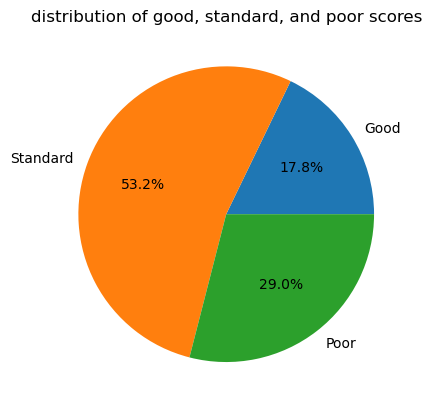

In [124]:
data = [df[df['Credit_Score']=='Good']['Credit_Score'].count(),
        df[df['Credit_Score']=='Standard']['Credit_Score'].count(),
       df[df['Credit_Score']=='Poor']['Credit_Score'].count()]
categories = ['Good', 'Standard', 'Poor']
plt.pie(data,
        labels=categories,
        autopct='%1.1f%%')
plt.title('distribution of good, standard, and poor scores')
plt.show()

Through the pie chart, we are able to see the distribution of the scores and notice that most people have a standard credit score. Now lets have a look at how credit score changes with age

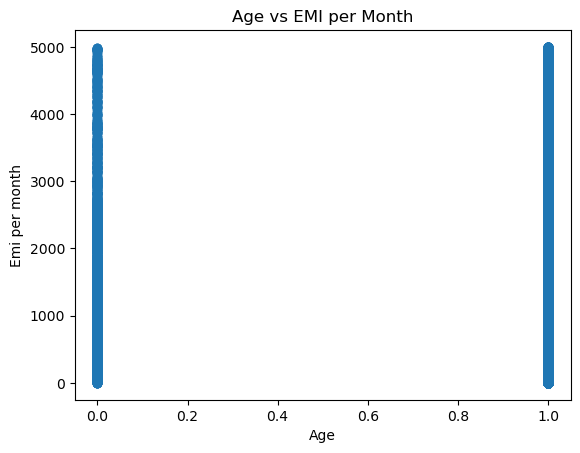

In [125]:
plt.scatter([df['Age']<100], df['Outstanding_Debt'])
plt.title("Age vs EMI per Month")
plt.xlabel("Age")
plt.ylabel("Emi per month")
plt.show()

Here are histograms to show what the data distributions look like overall. From this data I wanted to see what the counts of each type of data is to determine which features would be relative to keep and which features have the most varied/distributed data. 

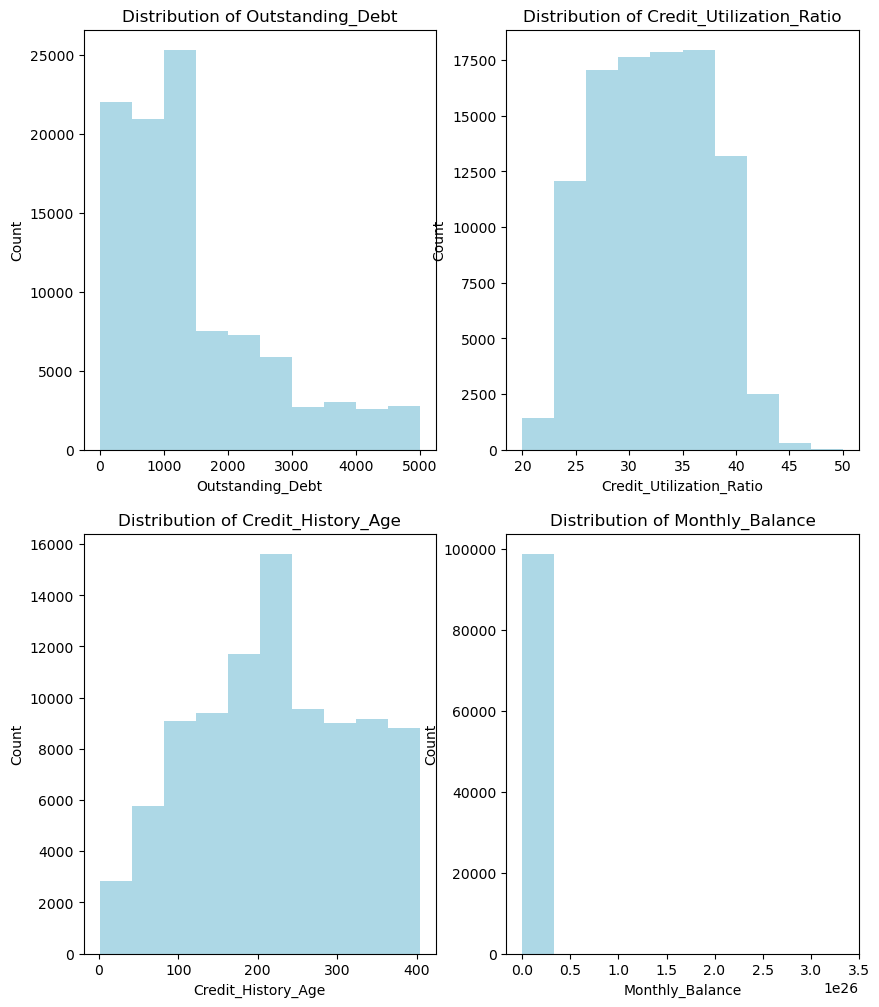

In [126]:
fig, axes = plt.subplots(2, 2, figsize = (10, 12))
axes[0, 0].hist(df['Outstanding_Debt'],
                    color = 'lightblue')
axes[0, 0].set_title('Distribution of Outstanding_Debt')
axes[0, 0].set_xlabel('Outstanding_Debt')
axes[0, 0].set_ylabel('Count')
axes[0, 1].hist(df['Credit_Utilization_Ratio'],
                    color = 'lightblue')
axes[0, 1].set_title('Distribution of Credit_Utilization_Ratio')
axes[0, 1].set_xlabel('Credit_Utilization_Ratio')
axes[0, 1].set_ylabel('Count')
axes[1, 0].hist(df['Credit_History_Age'],
                    color = 'lightblue')
axes[1, 0].set_title('Distribution of Credit_History_Age')
axes[1, 0].set_xlabel('Credit_History_Age')
axes[1, 0].set_ylabel('Count')
axes[1, 1].hist(df['Monthly_Balance'],
                    color = 'lightblue')
axes[1, 1].set_title('Distribution of Monthly_Balance')
axes[1, 1].set_xlabel('Monthly_Balance')
axes[1, 1].set_ylabel('Count')
plt.show()

Here different box plots were graphed to see how the data varied within different occupations. We predicted that different occupations would have much different Credit Utilization Scores and Monthly Investments and the boxplots help wee how much different each occupation is. 

['Musician', 'Architect', 'Writer', 'Developer', 'Scientist', 'Journalist', 'Manager', 'Lawyer', 'Mechanic', 'Entrepreneur', 'Teacher', 'Media_Manager', 'Engineer', '_______', 'Accountant']
float64


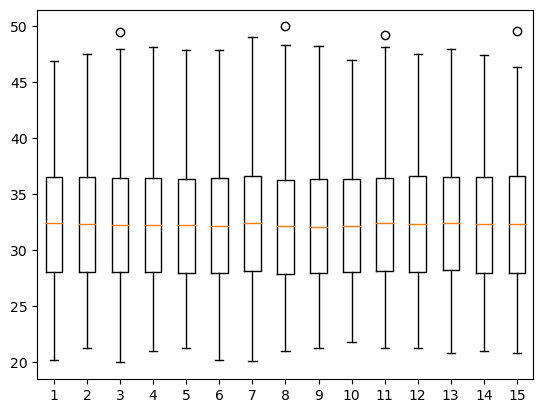

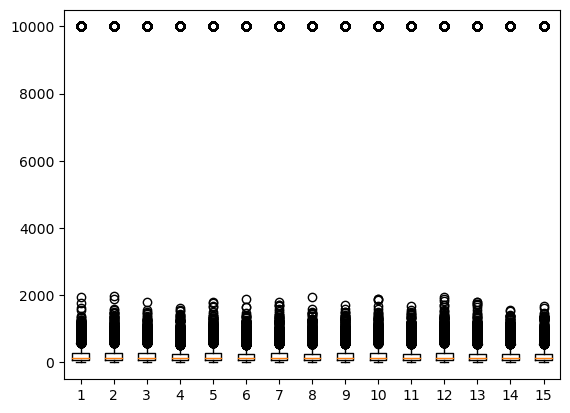

[451.24651937 322.72031971 176.26422577 ...  88.30491282 245.81194094
 246.33424211]
[25.71557884311532, 28.711202517052943, 34.92287233220604, 26.51363149248924, 38.64911430691306, 44.6768885939621, 28.807349824215013, 33.89444259920451, 26.084542750932684, 25.665856781285065, 33.66946005394869, 34.503707241298585, 41.17638419789344, 27.182482771287628, 28.781887776659712, 38.9796611529839, 35.030349081579885, 27.19720883392748, 35.91940492740646, 25.585205200232163, 35.706437003014834, 23.245481545534325, 38.78895428776155, 37.40993371585021, 24.251028181031927, 38.78765214795482, 25.038052402331104, 23.09179311667229, 31.33422002336577, 29.706453768241733, 36.572989910187616, 33.434371517540995, 38.389820031990425, 36.62486341899649, 31.360244741417908, 41.66180246621809, 25.026326020444888, 23.91628778322776, 34.70500518081173, 35.15493570343151, 28.389671628456675, 39.647077576006616, 37.47919344460186, 32.49554829929235, 38.16357110386918, 28.955438083278302, 26.643505517944988, 

In [127]:
occupations = df['Occupation'].tolist()
ocset = set(occupations)
listoc = list(ocset)
del listoc[0]
print(listoc)
print(df['Credit_Utilization_Ratio'].dtype)
all_oc_cr = []
all_oc_mn = []
# list_temp = df.query("Occupation=='Doctor'")['Monthly_Balance'].tolist()
# print(list_temp)
for i in range(len(listoc)):
  # print(listoc[i])
  list_temp = df.query(f"Occupation=='{listoc[i]}'")['Credit_Utilization_Ratio'].tolist() #Credit_Utilization_Ratio
  # print(list_temp)
  all_oc_cr.append(list_temp)
  # print(all_oc)
plt.boxplot(all_oc_cr)
plt.show()
for i in range(len(listoc)):
  # print(listoc[i])
  list_temp = df.query(f"Occupation=='{listoc[i]}'")['Amount_invested_monthly'].tolist() #Credit_Utilization_Ratio
  # print(list_temp)
  arr = np.array(list_temp)
  arr = arr[~np.isnan(arr)]
  arr.tolist()
  all_oc_mn.append(arr)
  # print(all_oc)
plt.boxplot(all_oc_mn)
plt.show()
print(all_oc_mn[0])
print(all_oc_cr[0])

Pie charts were made to see how the distribution of credit scores varies within each occupation as well to see if different occupations have different score distributions. 

/var/folders/y0/5ztckd2n7196vnz2qzjhyv580000gn/T/ipykernel_59664/1467044987.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [df[df['Occupation']==listoc[i]][df['Credit_Score']=='Good']['Credit_Score'].count(),
/var/folders/y0/5ztckd2n7196vnz2qzjhyv580000gn/T/ipykernel_59664/1467044987.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Occupation']==listoc[i]][df['Credit_Score']=='Standard']['Credit_Score'].count(),
/var/folders/y0/5ztckd2n7196vnz2qzjhyv580000gn/T/ipykernel_59664/1467044987.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Occupation']==listoc[i]][df['Credit_Score']=='Poor']['Credit_Score'].count()]


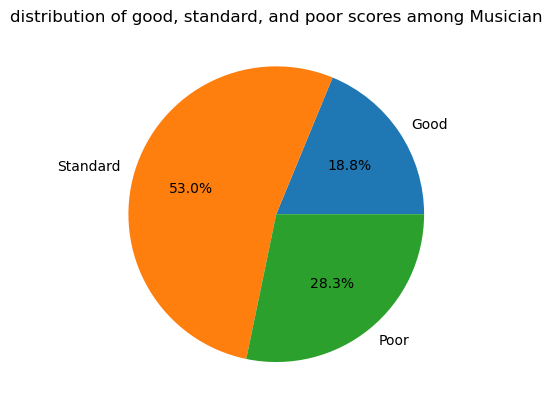

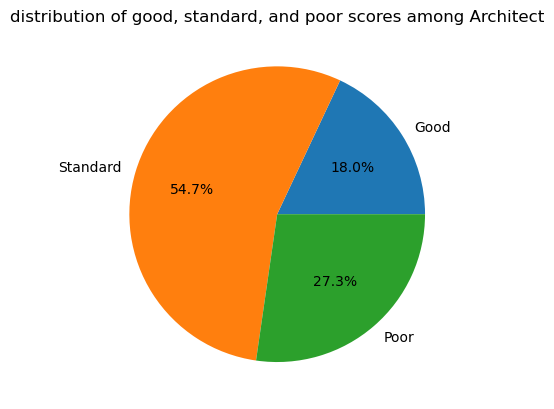

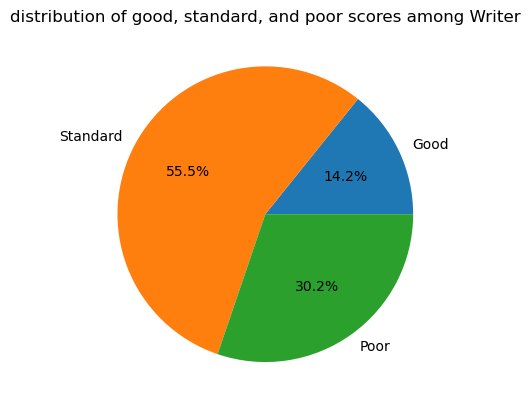

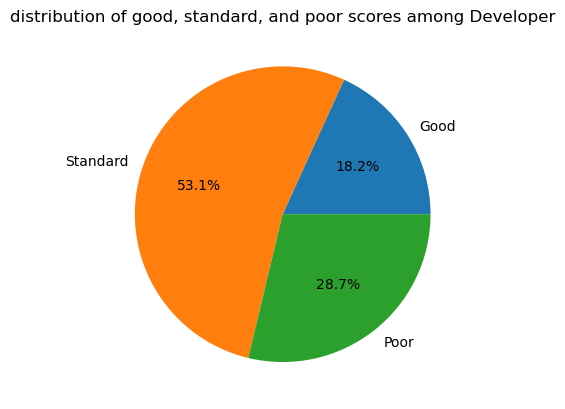

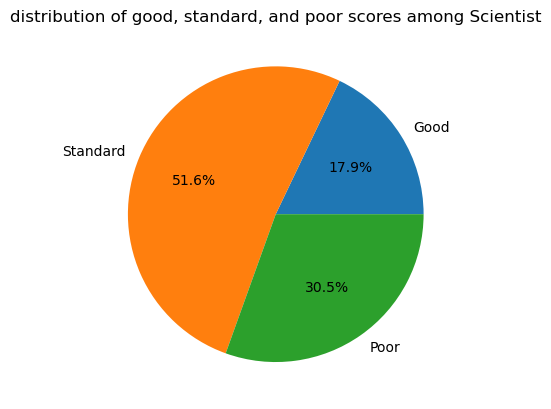

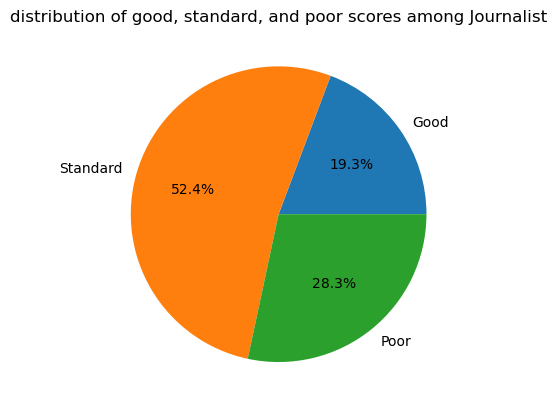

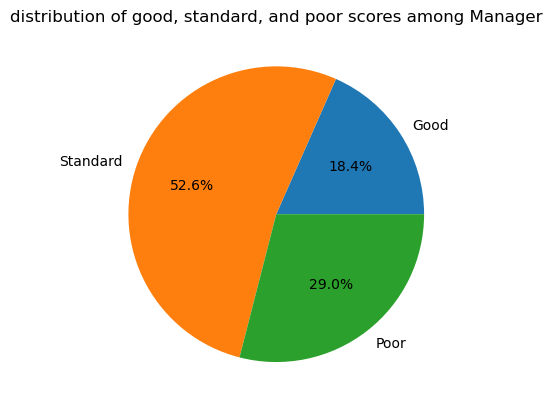

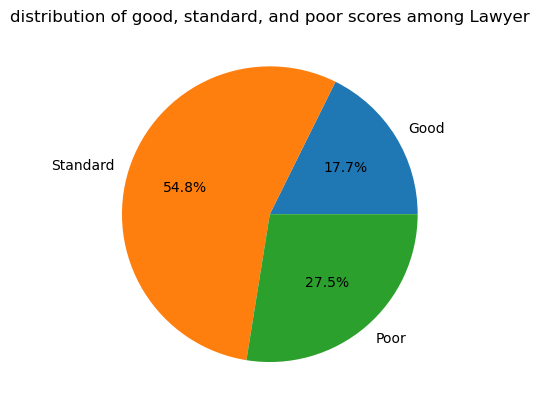

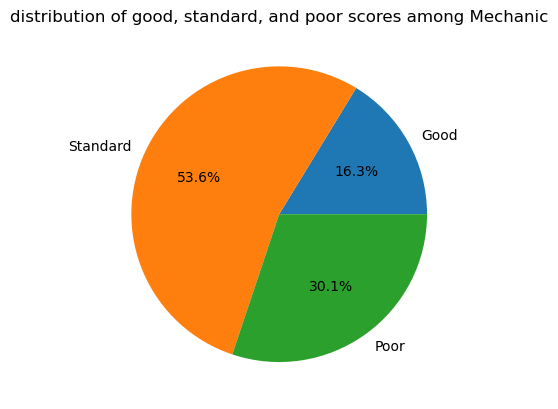

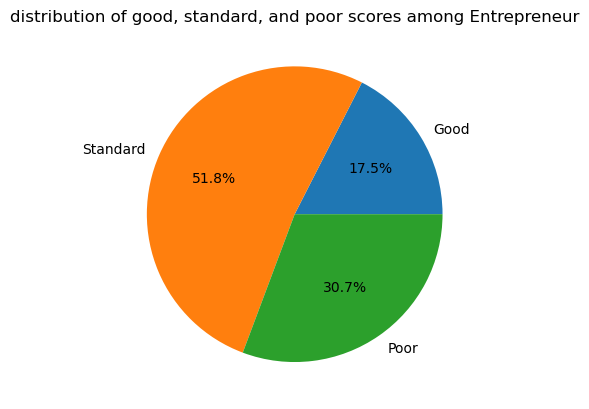

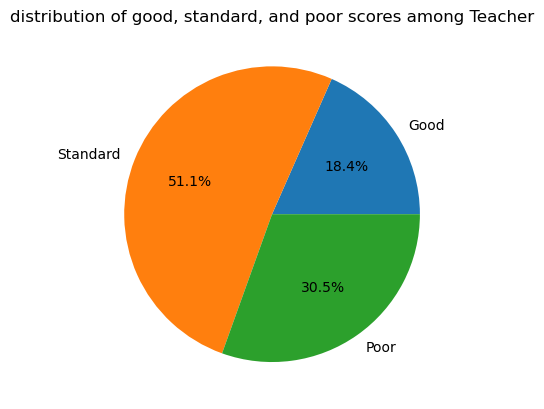

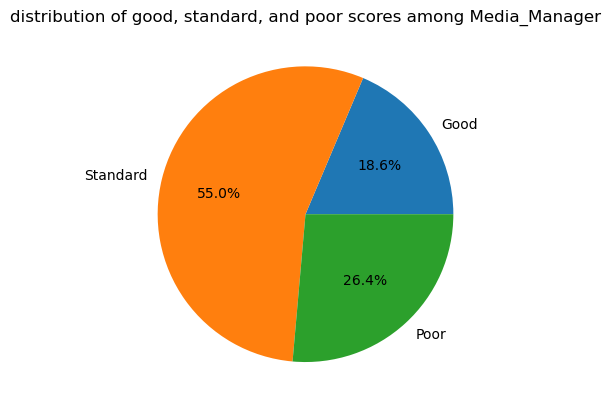

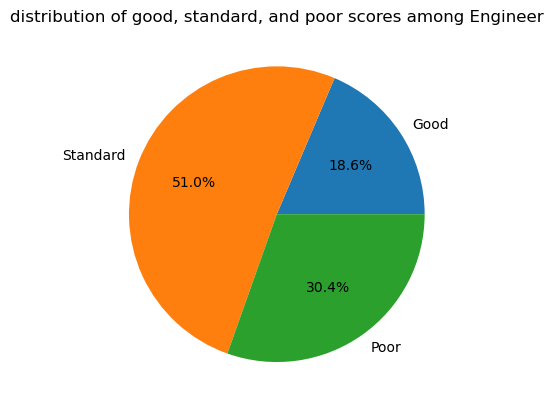

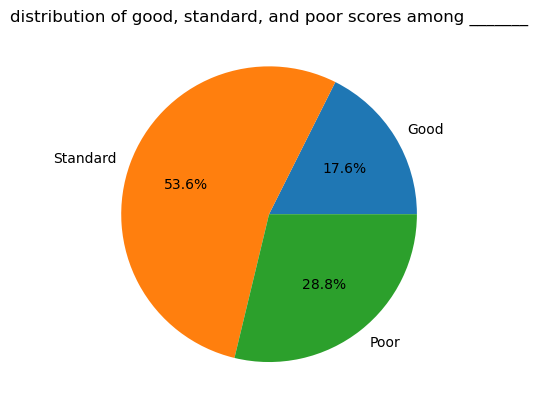

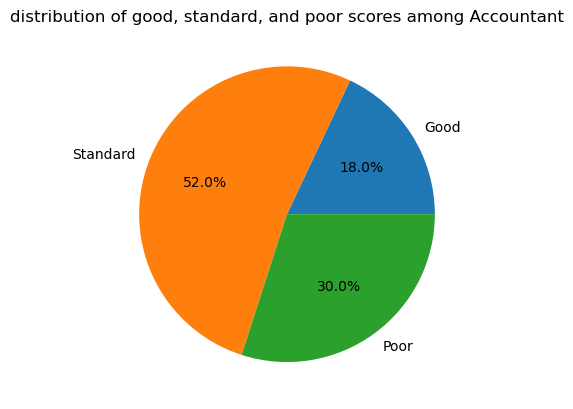

In [128]:

for i in range(len(listoc)):
  data = [df[df['Occupation']==listoc[i]][df['Credit_Score']=='Good']['Credit_Score'].count(),
        df[df['Occupation']==listoc[i]][df['Credit_Score']=='Standard']['Credit_Score'].count(),
       df[df['Occupation']==listoc[i]][df['Credit_Score']=='Poor']['Credit_Score'].count()]
  categories = ['Good', 'Standard', 'Poor']
  plt.pie(data,
          labels=categories,
          autopct='%1.1f%%')
  plt.title('distribution of good, standard, and poor scores among ' + listoc[i])
  plt.show()

Lastly, we made a correlation map to see which data has the most correlationb and should be compared/kept and which relationships can be explored further. 

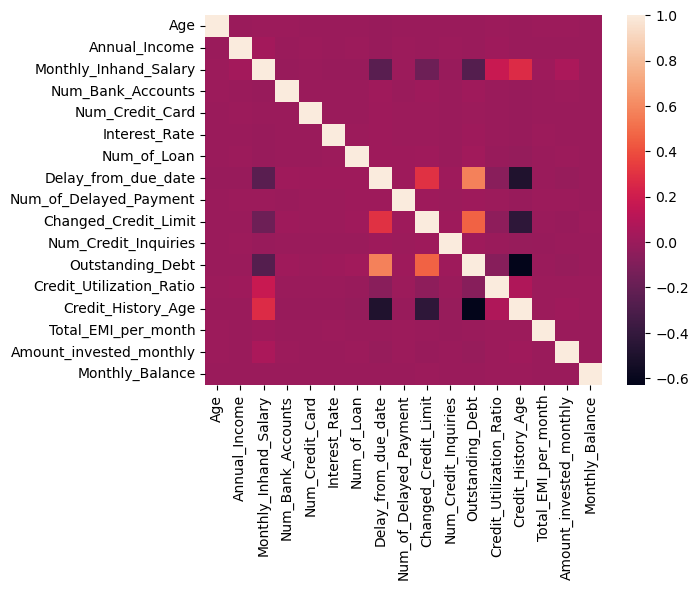

In [129]:
# print(df.corr())
dataplot = sb.heatmap(df.corr(), annot=False)
plt.show()

# Feature Engineering

In [130]:
# remove outliers / NaNs / imputation

# replace all outlier age values with NaN
df.loc[df['Age'] > 100, 'Age'] = np.nan
# impute NaN values
df['Age'] = df['Age'].fillna(df.groupby('SSN')['Age'].transform('median'))
# impute NaN values
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df.groupby('SSN')['Monthly_Inhand_Salary'].transform('median'))
df.head()




,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [131]:
# drop features : SSN, ID, Customer_ID, Name, Occupation 
df = df.drop(['SSN', 'ID', 'Customer_ID', 'Name', 'Occupation'], axis=1)

# drop features with high correlation with another feature:
df = df.drop(['Delay_from_due_date', 'Monthly_Balance'], axis=1)
df.head()

KeyError: "['Name'] not found in axis"

In [ ]:
#one hot encoding
df_payment_min = pd.get_dummies(df['Payment_of_Min_Amount'].tolist())
payment_min_yes = df_payment_min['Yes'].tolist()

df_credit_mix = pd.get_dummies(df['Credit_Mix'].tolist())
credit_mix_good = df_credit_mix['Good'].tolist()
credit_mix_standard = df_credit_mix['Standard'].tolist()



df.insert(12, "good_credit_mix", credit_mix_good)
df.insert(13, "standard_credit_mix", credit_mix_standard)

payment_behavior = df['Payment_Behaviour'].tolist()
df_payment_behavior = pd.get_dummies(payment_behavior, drop_first=False)

high_small_list = df_payment_behavior['High_spent_Small_value_payments'].tolist()
high_med_list = df_payment_behavior['High_spent_Medium_value_payments'].tolist()
high_large_list = df_payment_behavior['High_spent_Large_value_payments'].tolist()
low_small_list = df_payment_behavior['Low_spent_Small_value_payments'].tolist()
low_med_list = df_payment_behavior['Low_spent_Medium_value_payments'].tolist()
low_large_list = df_payment_behavior['Low_spent_Large_value_payments'].tolist()

df.insert(22, 'High_spent_Small_value_payments', high_small_list)
df.insert(23, 'High_spent_Medium_value_payments', high_med_list)
df.insert(24, 'High_spent_Large_value_payments', high_large_list)
df.insert(25, 'Low_spent_Small_value_payments', low_small_list)
df.insert(26, 'Low_spent_Medium_value_payments', low_med_list)
df.insert(27, 'Low_spent_Large_value_payments', low_large_list)

df.head(15)

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age','Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Num_Bank_Accounts', 'Num_Credit_Card',
                  'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                  'Num_Credit_Inquiries' ,'Credit_Utilization_Ratio' ,'Credit_History_Age',
                  'Total_EMI_per_month', 'Amount_invested_monthly', 'good_credit_mix', 'standard_credit_mix', 
                 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'Low_spent_Small_value_payments',
                  'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments']
scaler = StandardScaler()
df[numerical_cols ] = scaler.fit_transform(df[numerical_cols ])
df.head()

In [ ]:
# Features have been selected and standardized 